# Importing libraries

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import numpy as np
import os
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  
 

In [0]:
#os.getcwd()

# Loading train and test data
# Checking missing values

In [0]:
dftrain = pd.read_csv('Train.csv')

In [35]:
dftrain.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1


In [36]:
print(dftrain.isnull().values.any())

True


In [37]:
dftrain = dftrain.fillna(0)
dftrain.isnull().sum(axis = 0)

id                 0
original_text      0
lang               0
retweet_count      0
original_author    0
sentiment_class    0
dtype: int64

In [0]:
dftest = pd.read_csv('Test.csv')

In [39]:
dftest.head()

,id,original_text,lang,retweet_count,original_author
0,1.246628e+18,"3. Yeah, I once cooked potatoes when I was 3 y...",en,0,LToddWood
1,1.245898e+18,"Happy Mother's Day to all the mums, step-mums,...",en,0,iiarushii
2,1.244717e+18,"I love the people from the UK, however, when I...",en,0,andreaanderegg
3,1.245730e+18,Happy 81st Birthday Happy Mother’s Day to my m...,en,1,TheBookTweeters
4,1.244636e+18,Happy Mothers day to all those wonderful mothe...,en,0,andreaanderegg


In [40]:
dftest = dftest.fillna(0)
dftest.isnull().sum(axis = 0)

id                 0
original_text      0
lang               0
retweet_count      0
original_author    0
dtype: int64

In [41]:
dftrain['sentiment_class'].value_counts()

 0    1701
-1     769
 1     765
Name: sentiment_class, dtype: int64

# Distribution of data

In [42]:
cnt1 = len(dftrain[dftrain['sentiment_class']==1])
cnt0 = len(dftrain[dftrain['sentiment_class']==0])
cnt_1 = len(dftrain[dftrain['sentiment_class']==-1])
pct0 = cnt0/(cnt1+cnt0+cnt_1)
print('percent 0',round(pct0*100,2))
pct1 = cnt1/(cnt0+cnt1+cnt_1)
print('percent 1',round(pct1*100,2))
pct_1 = cnt_1/(cnt0+cnt1+cnt_1)
print('percent -1',round(pct_1*100,2))

percent 0 52.58
percent 1 23.65
percent -1 23.77


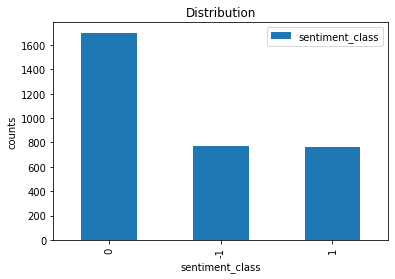

In [43]:
pd.value_counts(dftrain['sentiment_class']).plot.bar()
plt.title('Distribution')
plt.xlabel('sentiment_class')
plt.ylabel('counts')
plt.legend()
plt.show()

In [44]:
dftrain.shape

(3235, 6)

In [45]:
dftest.shape

(1387, 5)

In [0]:
#len(dftrain['tweet'])

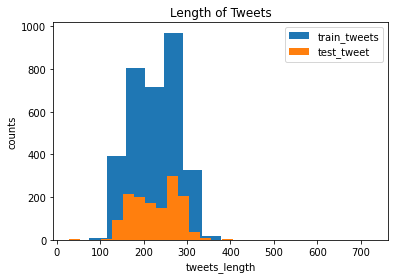

In [46]:
trainlen = dftrain['original_text'].str.len()
testlen = dftest['original_text'].str.len()
plt.hist(trainlen,label ='train_tweets',bins=15)
plt.hist(testlen,label = 'test_tweet',bins=15)
plt.title('Length of Tweets')
plt.xlabel('tweets_length')
plt.ylabel('counts')
plt.legend()
plt.show()

In [47]:
# get a word count per sentence column
def word_count(sentence):
    return len(sentence.split())
    
dftrain['word count'] = dftrain['original_text'].apply(word_count)
dftrain.head(3)


,id,original_text,lang,retweet_count,original_author,sentiment_class,word count
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0,43
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0,60
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1,51


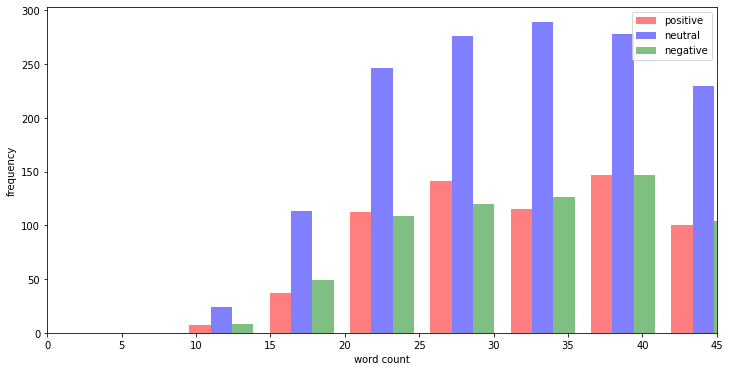

In [48]:
x = dftrain['word count'][dftrain.sentiment_class == 1]
y = dftrain['word count'][dftrain.sentiment_class == 0]
z = dftrain['word count'][dftrain.sentiment_class == -1]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('word count')
plt.ylabel('frequency')
g = plt.hist([x, y, z], color=['r','b','g'], alpha=0.5, label=['positive','neutral','negative'])
plt.legend(loc='upper right')

# Getting most common words in training dataset


In [49]:
import nltk
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer #Load #training dataset to Pandas and preview the top rows.
from collections import Counter

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [50]:
all_words = []
for line in list(dftrain['original_text']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(10)    
    


[('to', 3926),
 ('happy', 3413),
 ('day', 3293),
 ('the', 3015),
 ('and', 2579),
 ('mothers', 2424),
 ('you', 2259),
 ('all', 2044),
 ('a', 1854),
 ('#mothersday', 1593)]

In [0]:
data = dftrain.append(dftest,ignore_index=True)

In [52]:
data.head()


,id,original_text,lang,retweet_count,original_author,sentiment_class,word count
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0.0,43.0
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0.0,60.0
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1.0,51.0
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0.0,18.0
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1.0,42.0


In [53]:
# helper function to clean tweets
'''def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove tickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    #tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet'''


"def processTweet(tweet):\n    # Remove HTML special entities (e.g. &amp;)\n    tweet = re.sub(r'\\&\\w*;', '', tweet)\n    #Convert @username to AT_USER\n    tweet = re.sub('@[^\\s]+','',tweet)\n    # Remove tickers\n    tweet = re.sub(r'\\$\\w*', '', tweet)\n    # To lowercase\n    tweet = tweet.lower()\n    # Remove hyperlinks\n    tweet = re.sub(r'https?:\\/\\/.*\\/\\w*', '', tweet)\n    # Remove hashtags\n    tweet = re.sub(r'#\\w*', '', tweet)\n    # Remove Punctuation and split 's, 't, 've with a space for filter\n    #tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)\n    # Remove words with 2 or fewer letters\n    tweet = re.sub(r'\x08\\w{1,2}\x08', '', tweet)\n    # Remove whitespace (including new line characters)\n    tweet = re.sub(r'\\s\\s+', ' ', tweet)\n    # Remove single space remaining at the front of the tweet.\n    tweet = tweet.lstrip(' ') \n    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:\n    tweet = ''.join(c for c 

In [0]:
#clean dataframe's text column
#data['tweet'] = data['tweet'].apply(processTweet)
# preview some cleaned tweets
#data['tweet'].head()

# Data Preprocessing

# Remove @ symbol

In [0]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

In [55]:
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['original_text'], "@[\w]*") 
data.head()

,id,original_text,lang,retweet_count,original_author,sentiment_class,word count,tidy_tweet
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0.0,43.0,Happy #MothersDay to all you amazing mothers o...
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0.0,60.0,Happy Mothers Day Mum - I'm sorry I can't be t...
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1.0,51.0,Happy mothers day To all This doing a mothers ...
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0.0,18.0,Happy mothers day to this beautiful woman...ro...
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1.0,42.0,Remembering the 3 most amazing ladies who made...


# Remove Punctuations,special symbols

In [56]:
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 
data.head(10)

,id,original_text,lang,retweet_count,original_author,sentiment_class,word count,tidy_tweet
0,1.245025e+18,Happy #MothersDay to all you amazing mothers o...,en,0,BeenXXPired,0.0,43.0,Happy #MothersDay to all you amazing mothers o...
1,1.245759e+18,Happy Mothers Day Mum - I'm sorry I can't be t...,en,1,FestiveFeeling,0.0,60.0,Happy Mothers Day Mum I m sorry I can t be t...
2,1.246087e+18,Happy mothers day To all This doing a mothers ...,en,0,KrisAllenSak,-1.0,51.0,Happy mothers day To all This doing a mothers ...
3,1.244803e+18,Happy mothers day to this beautiful woman...ro...,en,0,Queenuchee,0.0,18.0,Happy mothers day to this beautiful woman ro...
4,1.244876e+18,Remembering the 3 most amazing ladies who made...,en,0,brittan17446794,-1.0,42.0,Remembering the most amazing ladies who made...
5,1.244524e+18,HAPPY MOTHER’S DAY! BRATZ WORLD FAMILIEZ YASMI...,en,0,chotia_mudit,0.0,25.0,HAPPY MOTHER S DAY BRATZ WORLD FAMILIEZ YASMI...
6,1.244202e+18,Happy Mother’s Day to all you wonderful mums o...,en,0,essentialartss,1.0,23.0,Happy Mother s Day to all you wonderful mums o...
7,1.244341e+18,Show me a mother of two as sexy as Rosie Happy...,en,0,gmassaro7,1.0,24.0,Show me a mother of two as sexy as Rosie Happy...
8,1.244049e+18,"To all the mothers, grandmothers, aunts, siste...",en,0,LToddWood,1.0,25.0,To all the mothers grandmothers aunts siste...
9,1.245780e+18,"To all the mothers around the World, Gas To He...",en,0,LiveGoodProduct,0.0,35.0,To all the mothers around the World Gas To He...


# Remove short words

In [0]:
data['tidy_tweet'] = data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# normalization

In [58]:
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [Happy, #MothersDay, amazing, mothers, there, ...
1    [Happy, Mothers, sorry, there, bring, Mothers,...
2    [Happy, mothers, This, doing, mothers, days, w...
3    [Happy, mothers, this, beautiful, woman, royal...
4    [Remembering, most, amazing, ladies, made, lat...
Name: tidy_tweet, dtype: object

In [0]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

# Word Cloud

In [0]:
data['tidy_tweet']=tokenized_tweet

In [61]:
data['tidy_tweet'].head()

0    [happi, #mothersday, amaz, mother, there, know...
1    [happi, mother, sorri, there, bring, mother, f...
2    [happi, mother, thi, do, mother, day, work, to...
3    [happi, mother, thi, beauti, woman, royalti, s...
4    [rememb, most, amaz, ladi, made, late, grandmo...
Name: tidy_tweet, dtype: object

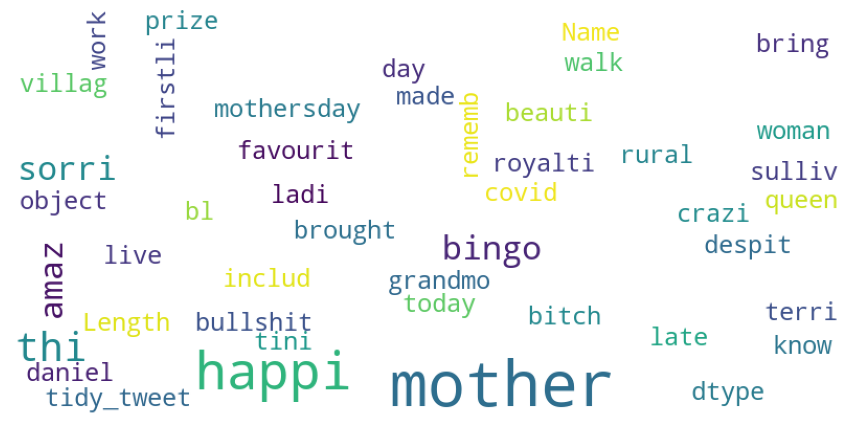

In [62]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(data['tidy_tweet'])

# word cloud for label 0

In [0]:
neutral_words =' '.join([str(text) for text in data['tidy_tweet'][data['sentiment_class'] == 0]]) 

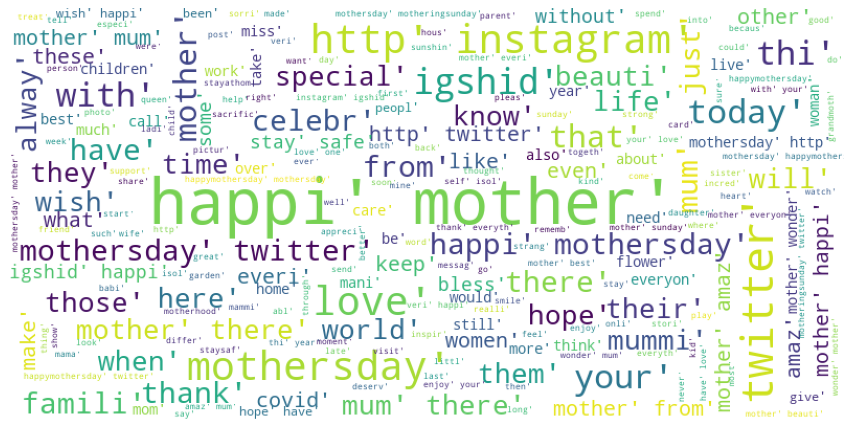

In [65]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(neutral_words)

# word cloud for label 1

In [0]:
positive_words =' '.join([str(text) for text in data['tidy_tweet'][data['sentiment_class'] == 1]]) 


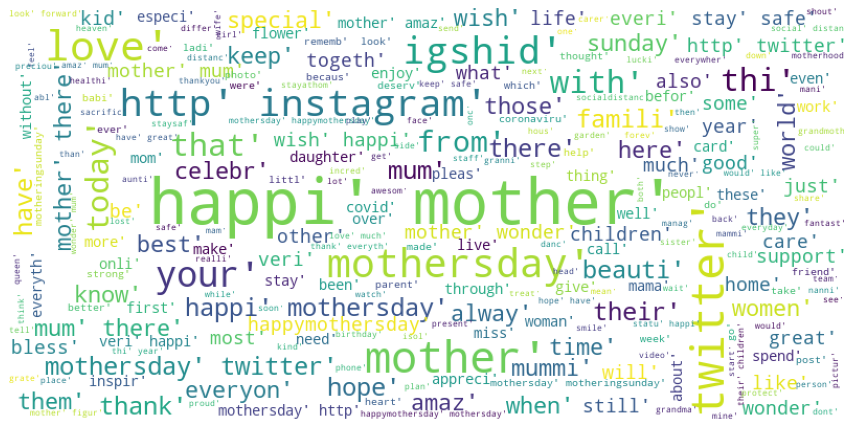

In [68]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(positive_words)

# word cloud for label -1

In [0]:
negative_words =' '.join([str(text) for text in data['tidy_tweet'][data['sentiment_class'] == -1]])

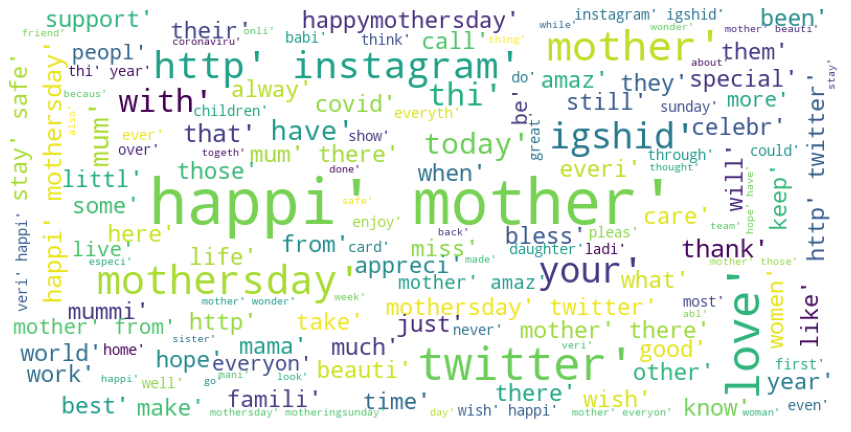

In [71]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(negative_words)

In [0]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
data['tidy_tweet'] = tokenized_tweet

In [73]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['tidy_tweet'])
bow.shape

(4622, 1000)

# TF-IDF

In [0]:
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

#import gensim


In [0]:
#vectorize_word = TfidfVectorizer(sublinear_tf=True,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',stop_words='english',ngram_range=(1, 1),max_features=10000)

In [0]:
#data1 = data['tidy_tweet']

In [0]:
#vectorize_word.fit(data1)
#train_features_word = vectorize_word.transform(data1)

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(data['tidy_tweet']) 
tfidf.shape

(4622, 1000)

In [0]:
#texts = [[word.lower() for word in line.split()] for line in data]


# Word2Vec

In [75]:
import gensim
tokenized_tweet = data['tidy_tweet'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(data['tidy_tweet']), epochs=20)

(1164555, 1900780)

In [77]:
model_w2v.wv.most_similar(positive="sad")
model_w2v['mother']
len(model_w2v['mother']) #The length of the vector is 200


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


200

In [0]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary continue
            if count != 0:
              vec /= count
    return vec

# preparing word2vec feature set

In [79]:
wordvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweet[i], 200)
    wordvec_df = pd.DataFrame(wordvec_arrays)
    wordvec_df.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score


In [0]:
train_bow = bow[:3235,:] 
test_bow = bow[3235:,:]
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, dftrain['sentiment_class'],random_state=42,test_size = 0.3)

# Logistic regression

# BOW

In [83]:
lreg = LogisticRegression() 
# training the model
lreg.fit(xtrain_bow, ytrain) 
prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set 
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int, average='weighted') # calculating f1 score for the validation set

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.2217559027701878

In [0]:
test_pred = lreg.predict_proba(test_bow) 
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int) 
dftest['sentiment_class'] = test_pred_int 
submission = dftest[['id','sentiment_class']] 
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

# TFIDF 

In [86]:
train_tfidf = tfidf[:3235,:] 
test_tfidf = tfidf[3235:,:] 
xtrain_tfidf = train_tfidf[ytrain.index] 
xvalid_tfidf = train_tfidf[yvalid.index]
lreg.fit(xtrain_tfidf, ytrain) 
prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int, average='weighted') # calculating f1 score for the validation set

0.10990645390527683

# Word2Vec

In [87]:
train_w2v = wordvec_df.iloc[:3235,:]
test_w2v = wordvec_df.iloc[3235:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:] 
xvalid_w2v = train_w2v.iloc[yvalid.index,:]
lreg.fit(xtrain_w2v, ytrain) 
prediction = lreg.predict_proba(xvalid_w2v)
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int)
f1_score(yvalid, prediction_int, average='weighted')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.139357545283819

In [0]:
from sklearn import svm

# SVM on Word2Vec

In [0]:
svc = svm.SVC(kernel='linear', C=1, probability=True).fit(xtrain_w2v, ytrain) 


In [91]:
prediction = svc.predict_proba(xvalid_w2v) 
prediction_int = prediction[:,1] >= 0.3 
prediction_int = prediction_int.astype(np.int) 
f1_score(yvalid, prediction_int, average='weighted')

0.09359560020682789